# Scrap ALL the cubes

## Yuri Numerov (Achifaifa)
## Slides/code at [code.achi.se/scrapcubes](http://github.com/achifaifa/scrapcubes)
## [achi.se](http://achi.se) - [achi (a) hush (.) ai](http://hue.hue/hue) - [@Achifaifa](https://twitter.com/achifaifa)

## Background

#### "Hey, you could scrape the cubes from lightake"
#### "Okay"

## Step 1: Write the spider

In [ ]:
import scrapy

class MySpider(scrapy.Spider):
  name='cubespider'
  allowed_domains=["lightake.com"]
  start_urls=['http://www.lightake.com/c/Puzzles-Magic-Cube_001?page=1&pagesize=16&sort=0&showtype=0&startprice=0&endprice=0']

  def parsecube(self,response):
    name=response.xpath('//h3[@class="mb10 f16"]/text()').extract()[0].strip()  
    sku=response.xpath('//div[@id="_productId"]/text()').extract()[0].strip()
    price=response.xpath('//span[@class="dtl_price"]/text()').extract()[0].strip()
    cubetype=response.xpath('//a[@class="vm"][3]/text()').extract()[0].strip()
    yield {'sku':sku, 'name':name, 'price':price, 'type':cubetype}

  def parse(self,response):
    cubes=response.xpath('//span[@class="ovh_2line mt5"]/a[@target="_blank"]/@href').extract()
    for cube in cubes:
      cubeurl=response.urljoin(cube)
      yield scrapy.Request(cubeurl,callback=self.parsecube)
    
    nexturl=response.xpath('//a[@class="inline_any page_simp"]/@href').extract()
    if nexturl: nexturl=response.urljoin(nexturl[0])
    yield scrapy.Request(nexturl, callback=self.parse)


## Step 2: Run the spider

`scrapy crawl <spidername> -o <filename>.csv`

## Step 3: ???, profit

![](./img/datacsv.png)

## Step 4: Use the data

In [48]:
cubes=[]
with open("../data/data.csv","r") as data:
    for line in data:
        if not line.startswith("sku"):
            line=line.split(',')
            cubes.append({'sku':line[0], 'price':line[1], 'type':line[2], 'name':line[3].strip()})

In [55]:
# Number of cubes over 10 USD

len([1 for i in cubes if float(i["price"].split()[-1])>10])

145

In [99]:
# Average price per brand

categories={i["type"]:[0,0] for i in cubes}
for i in cubes: 
    categories[i["type"]][0]+=1
    categories[i["type"]][1]+=float(i["price"].split()[-1])
categories={key:round(val[1]/val[0],2) for key,val in categories.iteritems()}
print categories


{'Cube Stands': 1.74, 'Cyclone Boys': 4.89, 'GuoJia/Type A': 2.83, 'GansPuzzle': 11.11, 'Cube Stickers': 2.98, 'FangShi/FS': 13.46, 'Irregular Puzzles': 6.16, '3x3': 6.55, 'Cube Components': 1.93, 'LWB': 11.6, 'CubeTwist': 7.39, 'DaYan': 13.84, 'GhostHand/GS': 3.73, '4x4x4': 4.96, 'SpeedStacks': 5.94, 'Mirror Cubes': 5.21, 'DaYan + MF8': 27.37, 'GuoBing/Type-C': 12.71, "Rubik's Snakes": 9.14, 'WitEden': 22.4, 'Others': 6.09, 'CYH': 5.48, 'Cube Lubes': 3.34, 'Octahedral': 4.7, 'DianSheng/DS': 6.81, 'YJ (MoYu)': 8.4, 'ZhiSheng': 21.23, 'Flying Cups': 5.18, 'ShengShou': 8.8, 'Ayi': 22.11, 'XWH (Maru)': 9.3, 'Timers': 10.36, 'Cube Bags': 2.09, 'MF8': 16.96, 'DIY Kits': 9.27, 'LingAo/LA': 4.74, 'QJ': 4.64, 'Cube Boxes': 2.0, '(MHZ) Cube4You': 11.11, 'QuickFinger': 5.19, 'Cube Keychain': 3.05, 'XM': 4.09, 'LanLan/LL': 6.03, '2x3': 8.4, '2x2': 3.66, 'Tools': 2.09}


([<matplotlib.axis.YTick at 0xaefb3eec>,
 <a list of 46 Text yticklabel objects>)

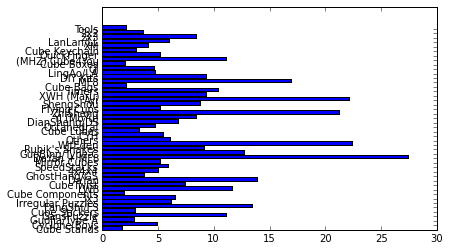

In [106]:
%matplotlib inline
import matplotlib.pyplot as pl
import numpy as n
brands=[i for i,z in categories.iteritems()]
ypos=n.arange(len(brands))
avgprice=[z for i,z in categories.iteritems()]

pl.barh(ypos, avgprice)
pl.yticks(ypos, brands)